# Stacked LSTM

In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from numpy import array
# Difference between required outputs for new LSTM layers, and Dense layers. 
# Difference in return_sequences as False and True
model = Sequential()
model.add(LSTM(1, return_sequences=True, input_shape=(3,1)))
model.compile(optimizer='adam', loss='mse')
# One sequence of 3 floats.
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# Make and show prediction
print(model.predict(data))
model.summary()

[[[ 0.01025771]
  [ 0.02812853]
  [ 0.05088762]]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 3, 1)              12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [27]:
model = Sequential()
model.add(LSTM(1, input_shape=(3,1)))
model.compile(optimizer='adam', loss='mse')
# input time steps
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
print(model.predict(data))
model.summary()

[[-0.06910652]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [28]:
# The return sequence makes the layer output a value for each input value rather than a single output value

## Stacking LSTM layers for predicting values for a damped sinewave sequence

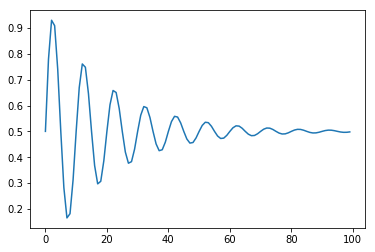

In [29]:
from math import sin, exp, cos, pi
from matplotlib import pyplot
from random import randint, uniform
%matplotlib inline

# Define example sequence of what we want
length = 100
period = 10
decay = 0.05
sequence = [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]

# Plot sequence for visualisation of what we are trying to do.
pyplot.plot(sequence)

In [30]:
# Example setup
def generate_sequence(length, period, decay):
    return [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]

In [31]:
# generate input and output pairs of damped sine waves
def generate_examples(length, n_sequences, output):
    X, y = list(), list()
    for _ in range(n_sequences):
        p = randint(10, 20)
        d = uniform(0.01, 0.1)
        sequence = generate_sequence(length + output, p, d)
        X.append(sequence[:-output])
        y.append(sequence[-output:])
    X = array(X).reshape(n_sequences, length, 1)
    y = array(y).reshape(n_sequences, output)
    return X, y

[[[ 0.5       ]
  [ 0.72137669]
  [ 0.87350503]
  [ 0.92923448]
  [ 0.88517617]
  [ 0.76025656]
  [ 0.58948423]
  [ 0.41474613]
  [ 0.27493685]
  [ 0.19765887]
  [ 0.19417883]
  [ 0.2584514 ]
  [ 0.37005035]
  [ 0.5       ]
  [ 0.61795334]
  [ 0.69900995]
  [ 0.72870356]
  [ 0.70522854]
  [ 0.6386692 ]
  [ 0.54767875]]

 [[ 0.5       ]
  [ 0.67259212]
  [ 0.80756717]
  [ 0.89050952]
  [ 0.91507435]
  [ 0.88311747]
  [ 0.8037393 ]
  [ 0.69146273]
  [ 0.56385886]
  [ 0.43897971]
  [ 0.3329511 ]
  [ 0.25802718]
  [ 0.22132129]
  [ 0.22432082]
  [ 0.26318133]
  [ 0.32969377]
  [ 0.41273949]
  [ 0.5       ]
  [ 0.57967535]
  [ 0.64198518]]

 [[ 0.5       ]
  [ 0.69281965]
  [ 0.83402536]
  [ 0.90530344]
  [ 0.9018429 ]
  [ 0.83177265]
  [ 0.71349938]
  [ 0.57160195]
  [ 0.43211203]
  [ 0.31802967]
  [ 0.24579709]
  [ 0.22322158]
  [ 0.24904712]
  [ 0.31407949]
  [ 0.40352048]
  [ 0.5       ]
  [ 0.58673035]
  [ 0.65024473]
  [ 0.68230564]
  [ 0.68074909]]]

[[ 0.45457526  0.38008246  0.3389

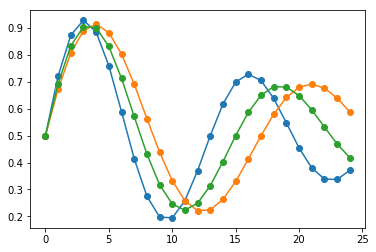

In [32]:
# See what the generate examples outpus 
X, y = generate_examples(20, 3, 5)
for i in range(len(X)):
    pyplot.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o')
print(X)
print()
print(y)

In [33]:
# configure problem
length = 50
output = 5

# define model
model = Sequential()
# 20 memory cells, 1 feature, 20 time steps
model.add(LSTM(20, return_sequences=True, input_shape=(length, 1)))
# 20 memory cells
model.add(LSTM(20))
# Predict 5 values
model.add(Dense(output))
model.compile(loss='mae', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 50, 20)            1760      
_________________________________________________________________
lstm_17 (LSTM)               (None, 20)                3280      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 105       
Total params: 5,145
Trainable params: 5,145
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Generate 10000 sequences and try to generalize a model to predicting values from it.
# verbose the weights after 10 sequences (batch_size) as i dont want to wait, although i 
# imagine a batch_size of 1 might be ideal, as it would reset the internal state of the
# model after each sample generalizing better.
X, y = generate_examples(length, 10000, output)
model.fit(X, y, batch_size=10, epochs=1, verbose=0)

In [35]:
# evaluate model
X, y = generate_examples(length, 1000, output)
loss = model.evaluate(X, y, verbose=0)
print('MAE: %f' % loss)

MAE: 0.020169


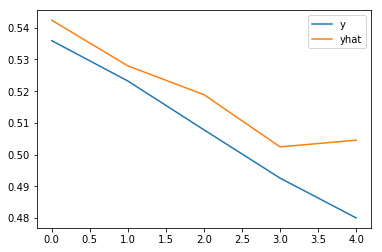

In [45]:
# prediction on new data to visualize performance on single sequence.
X, y = generate_examples(length, 1, output)
yhat = model.predict(X, verbose=0)
pyplot.plot(y[0], label='y')
pyplot.plot(yhat[0], label='yhat')
pyplot.legend()

In [46]:
# One might think the predictions could have been better
# however we tried to generalize a model for non stationary 
# random data, we could however generate only 1 sequence and
# make the model memorize it, but that isn't the goal.